## Observations and Insights 

In [1]:
#Observation 1:
# When observing Capomulin being treated on mouse s185, I can see that every passing day the tumor size decreases. 
# Which can mean that the drug is working in reducing the tumor.

#Observing 2:
# According to the scatter plot, the larger the average tumor volume the larger the weight. 
# Which makes sense, since you’d expect something larger to have a bigger weight.

#Observing 3:
# Seeing the box plot, Infubinol is the only drug that was plotted that had a very noticeable outlier. 
# Making it very unique when compared to the other 3.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_number =mouse_data["Mouse ID"].value_counts()
mice_number.count()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data["Mouse ID"].value_counts()
g989_duplicates = mouse_data.loc[(mouse_data["Mouse ID"] == "g989"),:]
g989_duplicates.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_number =clean_data["Mouse ID"].value_counts()
clean_number.count()

249

## Summary Statistics

In [8]:
clean_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

drug_mean = clean_data.groupby(by=["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = clean_data.groupby(by=["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_variance = clean_data.groupby(by=["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_std = clean_data.groupby(by=["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_sem = clean_data.groupby(by=["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series 
# and putting them all together at the end.

summary_table_1 = pd.DataFrame({"Mean" : drug_mean, "Median" : drug_median, 
                                "Variance" : drug_variance, "Standard Deviation" : drug_std,
                               "SEM" : drug_sem})
summary_table_1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
complete_groupby = clean_data.groupby("Drug Regimen")

# This method produces everything in a single groupby function
summary_table_2 = complete_groupby.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

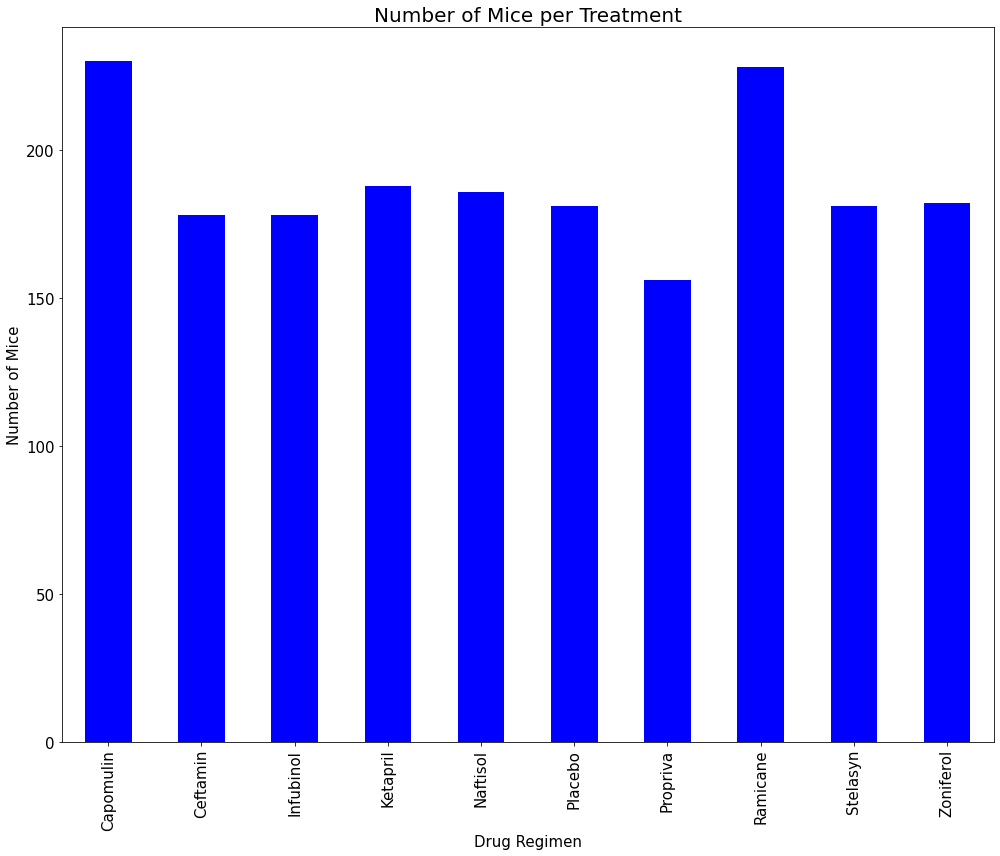

In [11]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 

mouse_count = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = mouse_count.plot.bar(figsize = (14,12), color = "blue", fontsize = 15)
plt.xlabel("Drug Regimen", fontsize= 15)
plt.ylabel("Number of Mice", fontsize= 15)
plt.title("Number of Mice per Treatment", fontsize=20)

plt.tight_layout()
plt.show()

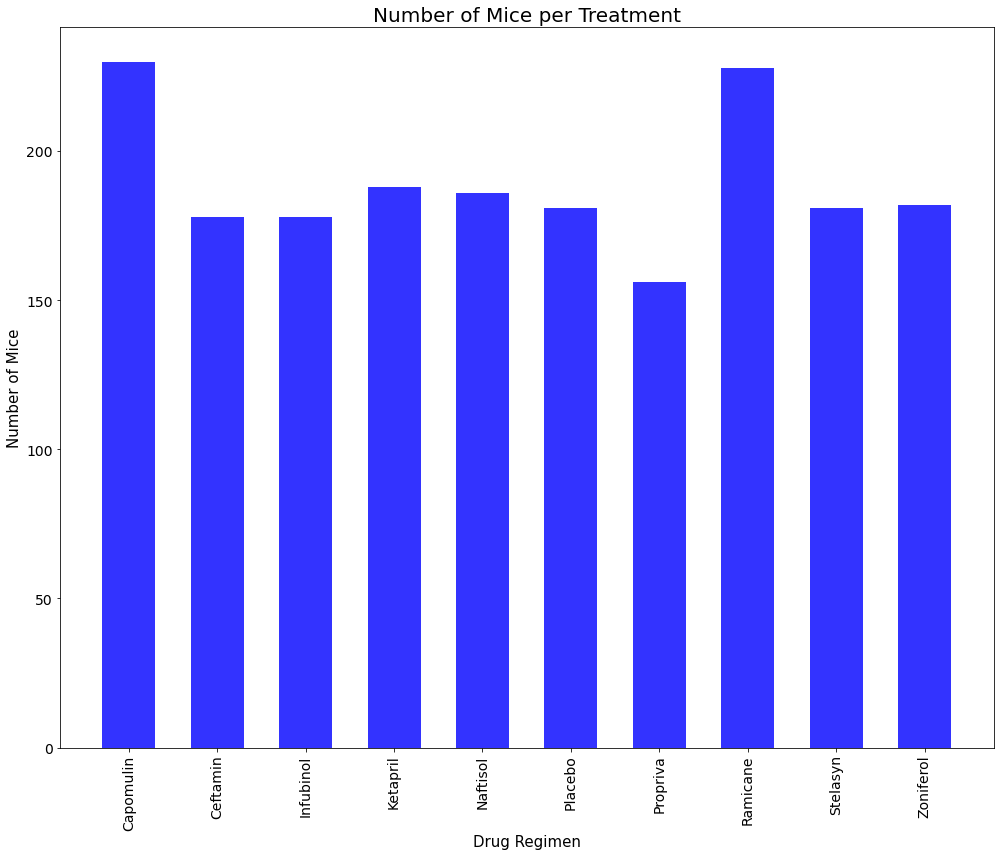

In [12]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.

list_of_mice = (clean_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(list_of_mice))
plt.figure(figsize=(14,12))
plt.bar(x_axis,list_of_mice, color = "blue", alpha = 0.8, align="center", width = 0.6)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin", "Infubinol","Ketapril",
                            "Naftisol", "Placebo" ,"Propriva", "Ramicane", "Stelasyn", "Zoniferol" ], rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Drug Regimen", fontsize= 15)
plt.ylabel("Number of Mice", fontsize= 15)
plt.title("Number of Mice per Treatment", fontsize=20)
plt.tight_layout()

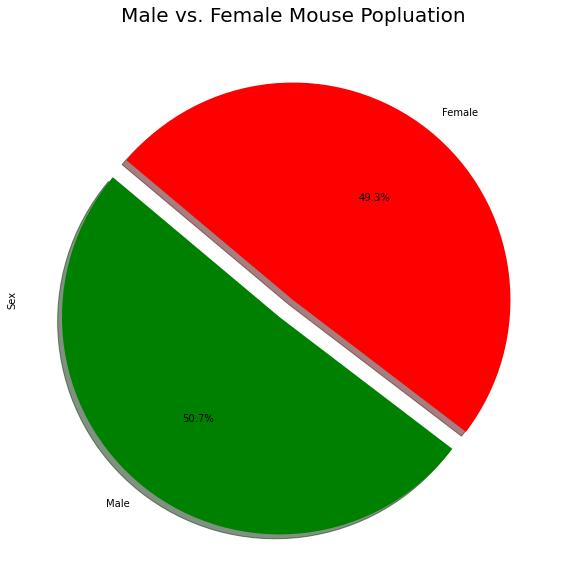

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_counts = clean_data.Sex.value_counts()
colors = ["Green", "Red"]
explode = (0.1,0)
gender_counts.plot(kind="pie", colors=colors, 
                   figsize=(15,10),startangle = 140, 
                             explode =explode, shadow = True,
                   autopct="%1.1f%%")
plt.title("Male vs. Female Mouse Popluation", fontsize=20)
plt.show()

(-1.1755066326598, 1.129125891541729, -1.1922583615934077, 1.1262834831032693)

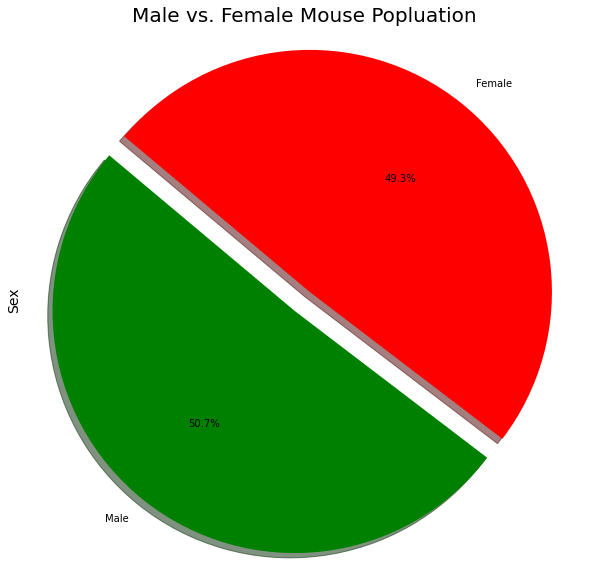

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [gender_counts]
colors = ["Green", "Red"]
explode = (0.1,0)
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels = labels, colors = colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs. Female Mouse Popluation", fontsize=20)
plt.ylabel("Sex",fontsize = 14)
plt.axis("equal",fontsize = 14)

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

treatment_last = clean_data.groupby("Mouse ID").max()["Timepoint"]
treatment_last = treatment_last.reset_index()
treatment_merge =pd.merge(treatment_last,clean_data, on=("Mouse ID","Timepoint"), how="left")
treatment_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
treatment_list =  ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]
tumor_volume_list = []
for drug in treatment_list:
    final_tumor = treatment_merge.loc[treatment_merge["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    tumor_volume_list.append(final_tumor)
    quartiles = final_tumor.quantile([0.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"The lower quartile of treatment is: {lowerq}")
    print(f"The upper quartile of treatment is: {upperq}")
    print(f"The interquartile range of treatment is: {iqr}")
    print(f"The the median of treatment is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 32.37735684
The upper quartile of treatment is: 40.1592203
The interquartile range of treatment is: 7.781863460000004
The the median of treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of treatment is: 31.56046955
The upper quartile of treatment is: 40.65900627
The interquartile range of treatment is: 9.098536719999998
The the median of treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of treatment is: 54.04860769
The upper quartile of treatment is: 65.52574285
The interquartile range of treatment is: 11.477135160000003
The the median of treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of treatment is: 48.72207785
The upper quartile of treatment is: 64.29983003
The inte

(10.0, 80.0)

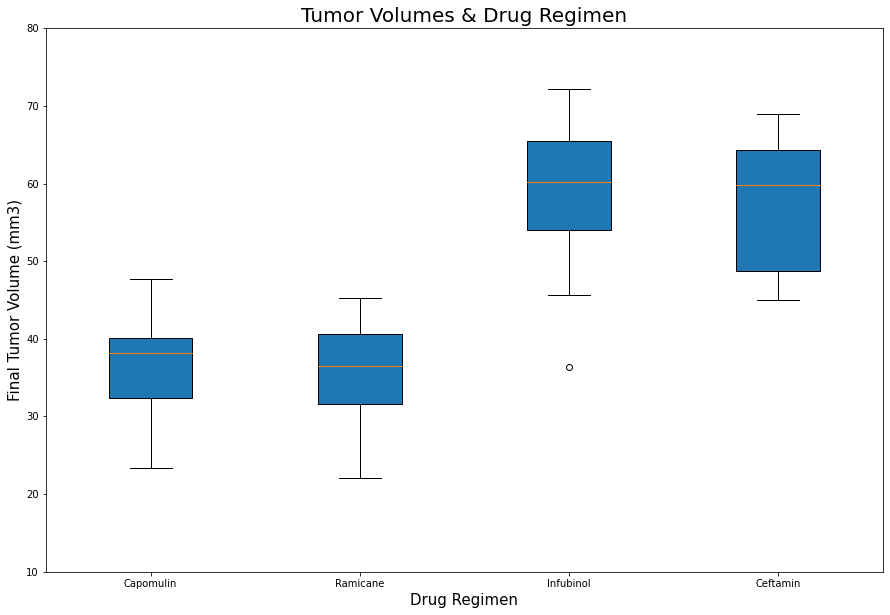

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title("Tumor Volumes & Drug Regimen", fontsize =20)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize = 15)
ax1.set_xlabel("Drug Regimen", fontsize = 15)

ax1.boxplot(tumor_volume_list, labels=treatment_list, widths=0.4, patch_artist=True, vert=True)
plt.ylim(10,80)

## Line and Scatter Plots

In [18]:
final_tumor = treatment_merge.loc[treatment_merge["Drug Regimen"]== drug, "Tumor Volume (mm3)"]

Text(0, 0.5, 'Tumor Volume (mm3)')

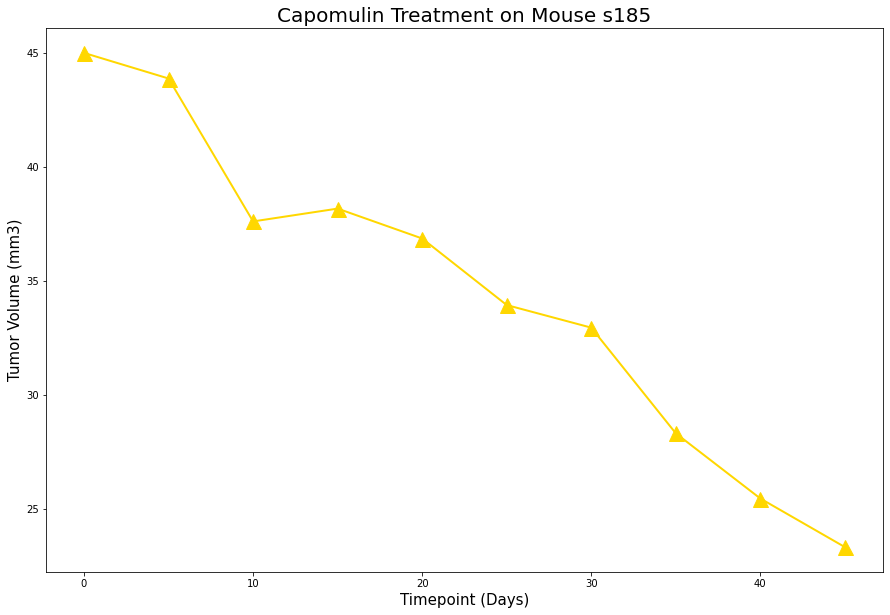

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = clean_data.loc[clean_data["Mouse ID"]=="s185",:]
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15,10))
plt.title("Capomulin Treatment on Mouse s185", fontsize =20)
plt.plot(x_axis,tumor_size, linewidth=2, markersize=15, marker="^", color="gold")
plt.xlabel("Timepoint (Days)", fontsize=15)
plt.ylabel("Tumor Volume (mm3)",fontsize=15)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

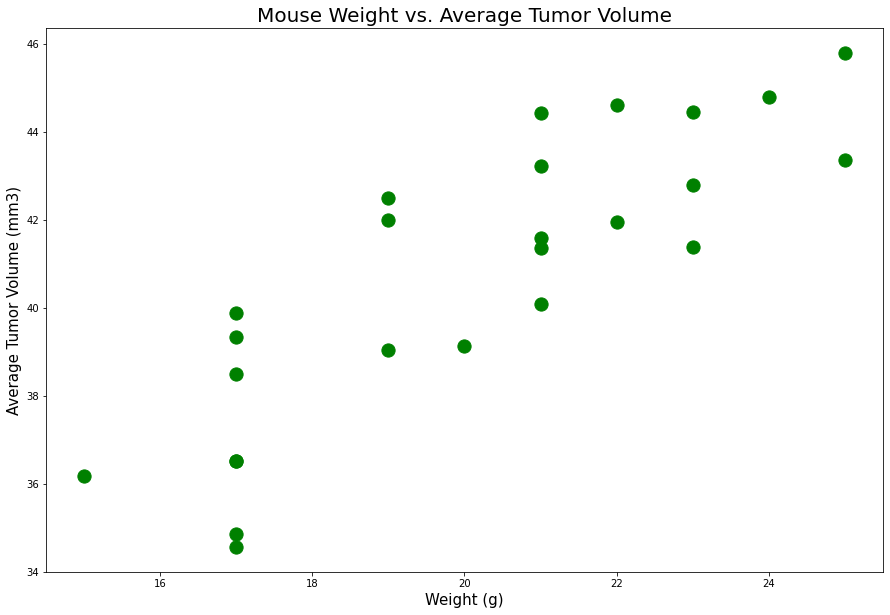

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

fig1, ax1 = plt.subplots(figsize=(15,10))
avg_vol = capomulin.groupby(["Mouse ID"]).mean()

marker_size=15
plt.scatter(avg_vol["Weight (g)"],avg_vol["Tumor Volume (mm3)"], s=175, color = "green")
plt.title("Mouse Weight vs. Average Tumor Volume", fontsize=20)
plt.xlabel("Weight (g)", fontsize=15)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=15)

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_vol["Weight (g)"],avg_vol["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between both factors is {correlation}")

The correlation between both factors is 0.84


In [22]:
x_values = avg_vol["Weight (g)"]
y_values = avg_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Text(20, 40, 'y = 0.95x + 21.55')

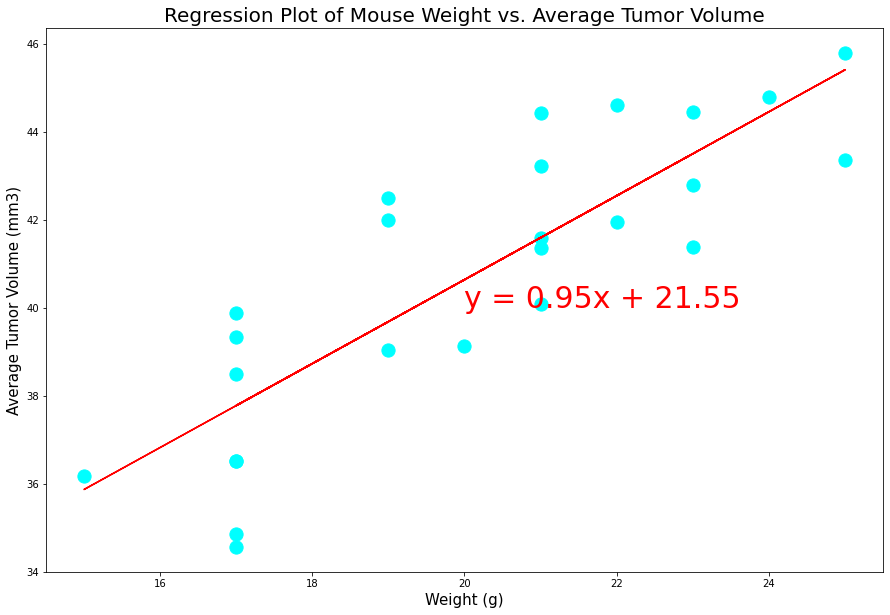

In [23]:
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, s=175, color = "cyan")
plt.plot(x_values,regress_values,"r-")
plt.title("Regression Plot of Mouse Weight vs. Average Tumor Volume", fontsize=20)
plt.xlabel("Weight (g)", fontsize=15)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=15)
plt.annotate(line_eq,(20,40),fontsize=30,color="red")